In [1]:
import marvin

[INFO]: No release version set. Setting default to DR15
[WARNING]: path /Users/richardzhang/sas/mangawork/manga/spectro/redux/v2_4_3/drpall-v2_4_3.fits cannot be found. Setting drpall to None. (MarvinUserWarning)
[WARNING]: path /Users/richardzhang/sas/mangawork/manga/spectro/analysis/v2_4_3/2.2.1/dapall-v2_4_3-2.2.1.fits cannot be found. Setting dapall to None. (MarvinUserWarning)


In [2]:
marvin.config.setRelease('DR16')

[WARNING]: path /Users/richardzhang/sas/dr16/manga/spectro/redux/v2_4_3/drpall-v2_4_3.fits cannot be found. Setting drpall to None. (MarvinUserWarning)
[WARNING]: path /Users/richardzhang/sas/dr16/manga/spectro/analysis/v2_4_3/2.2.1/dapall-v2_4_3-2.2.1.fits cannot be found. Setting dapall to None. (MarvinUserWarning)


# Switch to DR16

In [3]:
marvin.config.release

'DR16'

# Packages Used

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os.path
from astropy.io import fits
from astropy.table import QTable, Column
import astropy.units as u
from scipy.optimize import minimize

In [5]:
# Physical Constants
c = 3E5 # km * s ^1
h = 1 # reduced hubble constant
H_0 =  100 * h # km * s^-1 * Mpc^-1

In [6]:
# Used files
DTable1 = QTable.read('Master_Table.txt',format='ascii.commented_header')
DTable2 = QTable.read('DRPall-master_file.txt',format='ascii.ecsv')
# Get the Mass of stars & redshifts & angular resolution of r50
m = DTable1['NSA_Mstar'].data
rat = DTable1['NSA_ba'].data
phi = DTable1['NSA_phi'].data
z = DTable2['redshift'].data
r50_ang = DTable2['nsa_elpetro_th50_r'].data

# Functions 
From 1D fitting & Potentially Useful Functions written by Ray Parker & Jacob Smith 

In [7]:
# from GalaxyFitting import likelihood_function
from Rotation_Curve_Functions import vel_b,v_d,vel_h_iso,vel_h_NFW,vel_h_Burket,v_co_iso,v_co_iso_nb,v_co_NFW,v_co_NFW_nb,v_co_Burket,v_co_Burket_nb

In [8]:
# Accessing more data
#all_galaxies = [list of all the galaxy IDs that you want to analyze]
#for galaxy_ID in all_galaxies:
    # use Marvin to access the data for galaxy_ID, or construct the file name for this galaxy on your local computer

# Playing with velocity maps (Plate # 7443)

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:title={'center':'Emission line Gaussian velocity: H-alpha 6564'}, xlabel='spaxel', ylabel='spaxel'>)

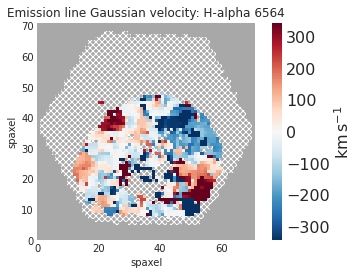

In [9]:
my_cube = marvin.tools.Maps('7443-12701')
gas_vfield = my_cube.emline_gvel_ha_6564
gas_vfield.plot()

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:title={'center':'Emission line Gaussian velocity: H-alpha 6564'}, xlabel='spaxel', ylabel='spaxel'>)

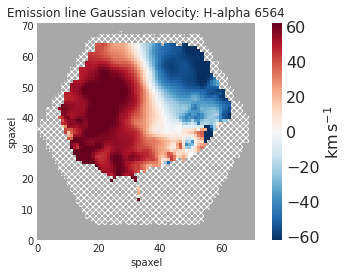

In [10]:
my_cube_2 = marvin.tools.Maps('7443-12702')
gas_vfield_2 = my_cube_2.emline_gvel_ha_6564
gas_vfield_2.plot()

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:title={'center':'Emission line Gaussian velocity: H-alpha 6564'}, xlabel='spaxel', ylabel='spaxel'>)

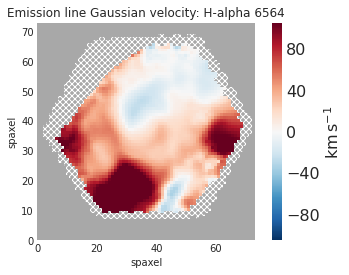

In [11]:
my_cube_3 = marvin.tools.Maps('7443-12703')
gas_vfield_3 = my_cube_3.emline_gvel_ha_6564
gas_vfield_3.plot()

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:title={'center':'Emission line Gaussian velocity: H-alpha 6564'}, xlabel='spaxel', ylabel='spaxel'>)

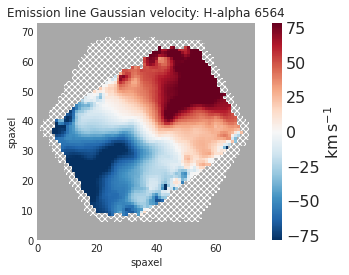

In [12]:
my_cube_4 = marvin.tools.Maps('7443-12704')
gas_vfield_4 = my_cube_4.emline_gvel_ha_6564
gas_vfield_4.plot()

<Marvin Map (property='emline_gvel_ha_6564')>
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] km / s

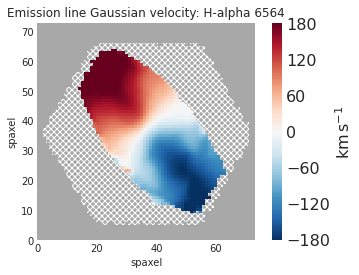

In [13]:
# Gas velocity map 
my_cube_5 = marvin.tools.Maps('7443-12705')
gas_vfield_5 = my_cube_5.emline_gvel_ha_6564
gas_vfield_5.plot()
gas_vfield_5

In [14]:
# Error for analysis
gas_ivar_5 = gas_vfield_5.ivar

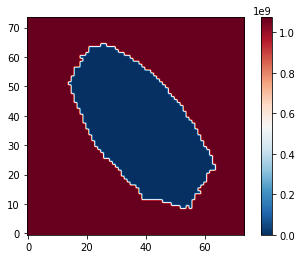

In [15]:
# mask for 7443-12705
plt.imshow(gas_vfield_5.mask,origin='lower',cmap='RdBu_r')
plt.colorbar()

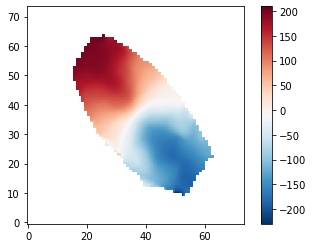

In [16]:
# Making a masked array
import numpy.ma as ma
v_mask = ma.array(gas_vfield_5.data,mask=gas_vfield_5.mask)
plt.imshow(v_mask,origin='lower',cmap='RdBu_r')
plt.colorbar()

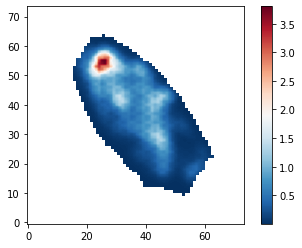

In [17]:
err_mask = ma.array(gas_ivar_5.data,mask=gas_vfield_5.mask)
plt.imshow(err_mask,origin='lower',cmap='RdBu_r')
plt.colorbar()

In [18]:
#plt.imshow(v_map,origin='lower',cmap='RdBu_r')
#plt.colorbar()

In [19]:
# Creating a circular model map
def model_velocity_map(shape,logM,r_d,rho_h,r_h,scale,center):
    model_map = np.zeros(shape)
    
    params = logM,r_d,rho_h,r_h
    
    for i in range(shape[0]):
        for j in range(shape[1]):
            r = np.sqrt((i-center[0])**2+(j-center[1])**2)
            r_in_kpc = r*scale
            
            model_map[i,j] = v_co_Burket_nb(r_in_kpc,params)
    return model_map

In [20]:
# Testing the circular velocity map
gal_shape = [74,74]
gal_redshift = 0.06447352468967438
gal_center = [37,37]

#v_map = model_velocity_map(gal_shape,11,10,0.005,20,gal_scale,gal_center)

In [21]:
# Inclined Velocity Field
def inclined_velocity_map(shape,logM,r_d,rho_h,r_h,center,inclination):
    inclined_map = np.zeros(shape)
    
    params = logM,r_d,rho_h,r_h
    
    for i in range(shape[0]):
        for j in range(shape[1]):
            x = (i-center[0])/np.cos(inclination)
            y = (j-center[1])
            r = np.sqrt(x**2+y**2)
            theta = np.arcsin(x/r)
            r_in_kpc = r*0.4688
            v = v_co_Burket_nb(r_in_kpc,params)*np.sin(inclination)*np.sin(theta)
            inclined_map[i,j] = v
    return inclined_map

[WARNING]: invalid value encountered in double_scalars (RuntimeWarning)
[WARNING]: invalid value encountered in double_scalars (RuntimeWarning)


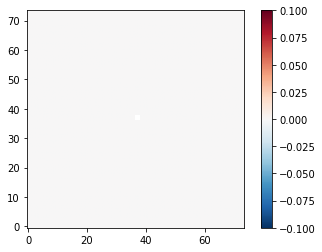

In [22]:
inclined_v_map_0 = inclined_velocity_map(gal_shape,10,6,0.005,20,gal_center,0)
plt.imshow(inclined_v_map_0,origin='lower',cmap='RdBu_r')
plt.colorbar()
plt.show()

[WARNING]: invalid value encountered in double_scalars (RuntimeWarning)


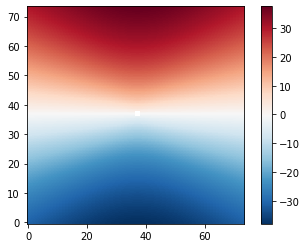

In [23]:
inclined_v_map_18 = inclined_velocity_map(gal_shape,10,6,0.005,20,gal_center,np.pi/10)
plt.imshow(inclined_v_map_18,origin='lower',cmap='RdBu_r')
plt.colorbar()

[WARNING]: invalid value encountered in double_scalars (RuntimeWarning)


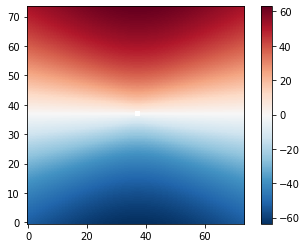

In [24]:
inclined_v_map_30 = inclined_velocity_map(gal_shape,10,6,0.005,20,gal_center,np.pi/6)
plt.imshow(inclined_v_map_30,origin='lower',cmap='RdBu_r')
plt.colorbar()

[WARNING]: invalid value encountered in double_scalars (RuntimeWarning)


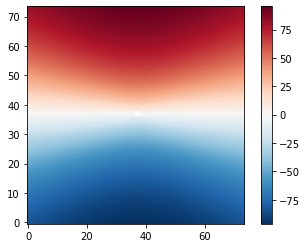

In [25]:
inclined_v_map_45 = inclined_velocity_map(gal_shape,10,6,0.005,20,gal_center,np.pi/4)
plt.imshow(inclined_v_map_45,origin='lower',cmap='RdBu_r')
plt.colorbar()

[WARNING]: invalid value encountered in double_scalars (RuntimeWarning)


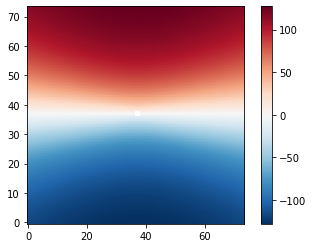

In [26]:
inclined_v_map_60 = inclined_velocity_map(gal_shape,10,6,0.005,20,gal_center,np.pi/3)
plt.imshow(inclined_v_map_60,origin='lower',cmap='RdBu_r')
plt.colorbar()

[WARNING]: The maximum number of subdivisions (50) has been achieved. (IntegrationWarning)
[WARNING]: invalid value encountered in double_scalars (RuntimeWarning)


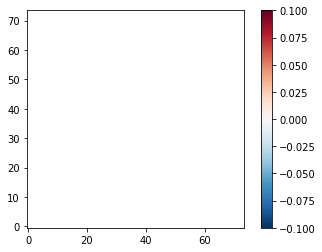

In [27]:
inclined_v_map_90 = inclined_velocity_map(gal_shape,10,6,0.005,15,gal_center,np.pi/2)
plt.imshow(inclined_v_map_90,origin='lower',cmap='RdBu_r')
plt.colorbar()

# 7443-12705

Useful values from data

In [28]:
# Obtain the effective radius for plate IFU 7443-12705
r50_spec = 0
z_spec = 0
for i in range(len(DTable2)):
    if DTable2['MaNGA_plate'][i] == 7443 and DTable2['MaNGA_IFU'][i] == 12705:
        r50_spec = r50_ang[i]
        z_spec = z[i]

# Obtain stellar mass of 7443-12705
m_spec = 0
for i in range(len(DTable1)):
    if DTable1['MaNGA_plate'][i] == 7443 and DTable1['MaNGA_IFU'][i] == 12705:
        m_spec = m[i]
print(np.log10(m_spec))

# Obtain inclination
incl = 0
for i in range(len(DTable1)):
    if DTable1['MaNGA_plate'][i] == 7443 and DTable1['MaNGA_IFU'][i] == 12705:
        incl = np.arccos(rat[i])
print(incl)

# Obtain phi
ph = 0
for i in range(len(DTable1)):
    if DTable1['MaNGA_plate'][i] == 7443 and DTable1['MaNGA_IFU'][i] == 12705:
        ph = phi[i]*np.pi/180
print(ph)

#  Calculate the recession velocity for 7443-12705
v_rec = z_spec * c # km/s

# Using Hubble's Law to calculate distance [kpc] for 7443-12705
d = v_rec/H_0 # Mpc
d *= 1E3 # kpc

# Using Small Angle Formula to calculate the actual value of r50 [kpc] for 7443-12705
theta = r50_spec/206265 # radian
r50 = theta * d # kpc
print(r50)
print(z_spec)
print(d)
scale_spec = 0.5*(193420.5)/206265
print(scale_spec)

10.353951647911828
1.2005955251079776
0.6421872084106552
6.912622583739364
0.0644735
193420.5
0.46886408261217366


# Functions for the different halo models

Isothermal Model

In [29]:
def rot_incl_iso(shape,params):
    A, Vin, logMdisk, Rd, Vinf, Rh,inclination,phi,center_x,center_y = params
    rotated_inclined_map = np.zeros(shape)
    
    for i in range(shape[0]):
        for j in range(shape[1]):
            x = ((i-center_x)*np.cos(phi) - np.sin(phi)*(j-center_y))/np.cos(inclination)
            y = ((i-center_x)*np.sin(phi) + np.cos(phi)*(j-center_y))
            r = np.sqrt(x**2+y**2)
            theta = np.arcsin(x/r)
            r_in_kpc = r*scale_spec
            v = v_co_iso(r_in_kpc,[A, Vin, logMdisk, Rd, Vinf, Rh])*np.sin(inclination)*np.sin(theta)
            rotated_inclined_map[i,j] = v
    return rotated_inclined_map

Isothermal Model w/o Bulge

In [30]:
def rot_incl_iso_nb(shape,params):
    logMdisk, Rd, Vinf, Rh,inclination,phi,center_x,center_y = params
    rotated_inclined_map = np.zeros(shape)
    
    for i in range(shape[0]):
        for j in range(shape[1]):
            x = ((i-center_x)*np.cos(phi) - np.sin(phi)*(j-center_y))/np.cos(inclination)
            y = ((i-center_x)*np.sin(phi) + np.cos(phi)*(j-center_y))
            r = np.sqrt(x**2+y**2)
            theta = np.arcsin(x/r)
            r_in_kpc = r*scale_spec
            v = v_co_iso_nb(r_in_kpc,[logMdisk, Rd, Vinf, Rh])*np.sin(inclination)*np.sin(theta)
            rotated_inclined_map[i,j] = v
    return rotated_inclined_map

NFW Model

In [31]:
def rot_incl_NFW(shape,params):
    A, Vin,logM,r_d,rho_h,r_h,inclination,phi,center_x,center_y = params
    rotated_inclined_map = np.zeros(shape)
    
    for i in range(shape[0]):
        for j in range(shape[1]):
            x = ((i-center_x)*np.cos(phi) - np.sin(phi)*(j-center_y))/np.cos(inclination)
            y = ((i-center_x)*np.sin(phi) + np.cos(phi)*(j-center_y))
            r = np.sqrt(x**2+y**2)
            theta = np.arcsin(x/r)
            r_in_kpc = r*scale_spec
            v = v_co_NFW(r_in_kpc,[A,Vin,logM,r_d,rho_h,r_h])*np.sin(inclination)*np.sin(theta)
            rotated_inclined_map[i,j] = v
    return rotated_inclined_map

NFW Model w/o Bulge

In [32]:
def rot_incl_NFW_nb(shape,params):
    logM,r_d,rho_h,r_h,inclination,phi,center_x,center_y = params
    rotated_inclined_map = np.zeros(shape)
    
    for i in range(shape[0]):
        for j in range(shape[1]):
            x = ((i-center_x)*np.cos(phi) - np.sin(phi)*(j-center_y))/np.cos(inclination)
            y = ((i-center_x)*np.sin(phi) + np.cos(phi)*(j-center_y))
            r = np.sqrt(x**2+y**2)
            theta = np.arcsin(x/r)
            r_in_kpc = r*scale_spec
            v = v_co_NFW_nb(r_in_kpc,[logM,r_d,rho_h,r_h])*np.sin(inclination)*np.sin(theta)
            rotated_inclined_map[i,j] = v
    return rotated_inclined_map

Burket Model 

In [33]:
def rot_incl_bur(shape,params):
    A, Vin,logM,r_d,rho_h,r_h,inclination,phi,center_x,center_y = params
    rotated_inclined_map = np.zeros(shape)
    
    for i in range(shape[0]):
        for j in range(shape[1]):
            x = ((i-center_x)*np.cos(phi) - np.sin(phi)*(j-center_y))/np.cos(inclination)
            y = ((i-center_x)*np.sin(phi) + np.cos(phi)*(j-center_y))
            r = np.sqrt(x**2+y**2)
            theta = np.arcsin(x/r)
            r_in_kpc = r*scale_spec
            v = v_co_Burket(r_in_kpc,[A,Vin,logM,r_d,rho_h,r_h])*np.sin(inclination)*np.sin(theta)
            rotated_inclined_map[i,j] = v
    return rotated_inclined_map

Burket Model w/o Bulge

In [34]:
def rot_incl_bur_nb(shape,params):
    logM,r_d,rho_h,r_h,inclination,phi,center_x,center_y = params
    rotated_inclined_map = np.zeros(shape)
    
    for i in range(shape[0]):
        for j in range(shape[1]):
            x = ((i-center_x)*np.cos(phi) - np.sin(phi)*(j-center_y))/np.cos(inclination)
            y = ((i-center_x)*np.sin(phi) + np.cos(phi)*(j-center_y))
            r = np.sqrt(x**2+y**2)
            theta = np.arcsin(x/r)
            r_in_kpc = r*0.4688
            v = v_co_Burket_nb(r_in_kpc,[logM,r_d,rho_h,r_h])*np.sin(inclination)*np.sin(theta)
            rotated_inclined_map[i,j] = v
    return rotated_inclined_map

# Fitting 
Loglikelihood functions

In [35]:
def loglikelihood_iso(params, shape, vdata, ivar):
    # Construct the model
    model = rot_incl_iso(shape, params)
    inv_sigma2 = ivar ** 2
    logL = -0.5 * np.nansum((vdata - model) ** 2 * inv_sigma2 - np.log(inv_sigma2))
    return logL

def nloglikelihood_iso(params, shape, vdata, ivar):
    return -loglikelihood_iso(params, shape, vdata, ivar)

In [36]:
def loglikelihood_iso_nb(params, shape, vdata, ivar):
    # Construct the model
    model = rot_incl_iso_nb(shape, params)
    inv_sigma2 = ivar ** 2
    logL = -0.5 * np.nansum((vdata - model) ** 2 * inv_sigma2 - np.log(inv_sigma2))
    return logL

def nloglikelihood_iso_nb(params, shape, vdata, ivar):
    return -loglikelihood_iso_nb(params, shape, vdata, ivar)

In [37]:
def loglikelihood_NFW(params, shape, vdata, ivar):
    # Construct the model
    model = rot_incl_NFW(shape, params)
    inv_sigma2 = ivar ** 2
    logL = -0.5 * np.nansum((vdata - model) ** 2 * inv_sigma2 - np.log(inv_sigma2))
    return logL

def nloglikelihood_NFW(params, shape, vdata, ivar):
    return -loglikelihood_NFW(params, shape, vdata, ivar)

In [38]:
def loglikelihood_NFW_nb(params, shape, vdata, ivar):
    # Construct the model
    model = rot_incl_NFW_nb(shape, params)
    inv_sigma2 = ivar ** 2
    logL = -0.5 * np.nansum((vdata - model) ** 2 * inv_sigma2 - np.log(inv_sigma2))
    return logL

def nloglikelihood_NFW_nb(params, shape, vdata, ivar):
    return -loglikelihood_NFW_nb(params, shape, vdata, ivar)

In [39]:
def loglikelihood_bur(params, shape, vdata, ivar):
    # Construct the model
    model = rot_incl_bur(shape, params)
    inv_sigma2 = ivar ** 2
    logL = -0.5 * np.nansum((vdata - model) ** 2 * inv_sigma2 - np.log(inv_sigma2))
    return logL

def nloglikelihood_bur(params, shape, vdata, ivar):
    return -loglikelihood_bur(params, shape, vdata, ivar)

In [40]:
def loglikelihood_bur_nb(params, shape, vdata, ivar):
    # Construct the model
    model = rot_incl_bur_nb(shape, params)
    inv_sigma2 = ivar ** 2
    logL = -0.5 * np.nansum((vdata - model) ** 2 * inv_sigma2 - np.log(inv_sigma2))
    return logL

def nloglikelihood_bur_nb(params, shape, vdata, ivar):
    return -loglikelihood_bur_nb(params, shape, vdata, ivar)

Isothermal Fitting

[WARNING]: invalid value encountered in double_scalars (RuntimeWarning)
[WARNING]: divide by zero encountered in double_scalars (RuntimeWarning)
[WARNING]: divide by zero encountered in log (RuntimeWarning)


---------------------------------------------------
      fun: 3398346816.9111376
 hess_inv: <10x10 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 6.55402372e+04,  1.74774184e+02, -4.91702912e+05, -8.91750975e+04,
       -2.28164537e+03,  2.34827496e+04,  3.44287094e+05, -4.12171064e+04,
        4.76409041e+18,  5.16668053e+18])
  message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 231
      nit: 0
     njev: 21
   status: 2
  success: False
        x: array([  0.2       , 150.        ,  10.85395165,   5.53009807,
       200.        ,  20.        ,   1.20059553,   0.64218721,
        37.        ,  37.        ])


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:title={'center':'Emission line Gaussian velocity: H-alpha 6564'}, xlabel='spaxel', ylabel='spaxel'>)

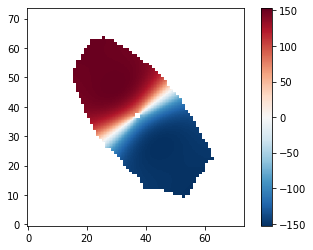

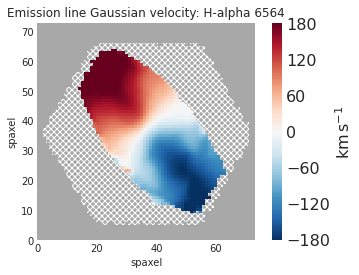

In [41]:
# Initial guesses
param_bounds_iso = [[0.2, 1],  # Scale Factor [unitless]
                [0.001, 1000],  # Bulge Scale Velocity [km/s]
                [np.log10(m_spec), 13],  # Disk mass [log(Msun)]
                [0.1, 20],  # Disk radius [kpc]
                [50, 500],  # Velocity at infinity [km/s]
                [0.1, 100],  # Halo radius [kpc]
                [0.1,np.pi/2], # Inclination angle
                [-np.pi/2,np.pi/2],# Phase angle
                [0.1,40],#center_x
                [0.1,40]] #center_y
p0_iso = [0.2,150,np.log10(m_spec)+0.5, 0.8*r50, 200, 20, incl,ph,37,37]
bestfit_iso = minimize(nloglikelihood_iso, p0_iso, args=(gal_shape, v_mask, gas_ivar_5),bounds=param_bounds_iso)
print('---------------------------------------------------')
print(bestfit_iso)
# Plotting Isothermal
bestfit_param_iso = [bestfit_iso.x[0],bestfit_iso.x[1],bestfit_iso.x[2],bestfit_iso.x[3],bestfit_iso.x[4],bestfit_iso.x[5],bestfit_iso.x[6],bestfit_iso.x[7],bestfit_iso.x[8],bestfit_iso.x[9]]
model_map_iso = rot_incl_iso(gal_shape,bestfit_param_iso)
mask_model_map_iso = ma.array(model_map_iso,mask=gas_vfield_5.mask)
plt.imshow(mask_model_map_iso,origin='lower',cmap='RdBu_r')
plt.colorbar()
gas_vfield_5.plot()

Isothermal Fitting w/o Bulge

[WARNING]: invalid value encountered in double_scalars (RuntimeWarning)
[WARNING]: invalid value encountered in double_scalars (RuntimeWarning)
[WARNING]: divide by zero encountered in log (RuntimeWarning)


---------------------------------------------------
      fun: 431726.7300716679
 hess_inv: <8x8 LbfgsInvHessProduct with dtype=float64>
      jac: array([-5.61949849e+05, -8.68878740e+04, -2.34397990e+03,  2.42481337e+04,
        2.60836435e+05, -4.07100828e+04,  1.82002686e+09,  1.82003935e+09])
  message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 189
      nit: 0
     njev: 21
   status: 2
  success: False
        x: array([ 10.85395165,   5.53009807, 200.        ,  20.        ,
         1.20059553,   0.64218721,  37.        ,  37.        ])


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:title={'center':'Emission line Gaussian velocity: H-alpha 6564'}, xlabel='spaxel', ylabel='spaxel'>)

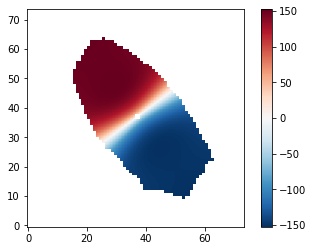

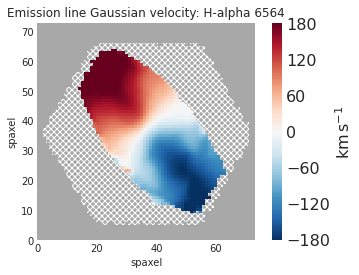

In [42]:
# Initial guesses
param_bounds_iso_nb = [[np.log10(m_spec), 13],  # Disk mass [log(Msun)]
                [0.1, 20],  # Disk radius [kpc]
                [50, 500],  # Velocity at infinity [km/s]
                [0.1, 100],  # Halo radius [kpc]
                [0.1,np.pi/2], # Inclination angle
                [-np.pi/2,np.pi/2],# Phase angle
                [0.1,40],#center_x
                [0.1,40]] #center_y
p0_iso_nb = [np.log10(m_spec)+0.5, 0.8*r50, 200, 20, incl,ph,37,37]
bestfit_iso_nb = minimize(nloglikelihood_iso_nb, p0_iso_nb, args=(gal_shape, v_mask, gas_ivar_5),bounds=param_bounds_iso_nb)
print('---------------------------------------------------')
print(bestfit_iso_nb)
# Plotting Isothermal
bestfit_param_iso_nb = [bestfit_iso_nb.x[0],bestfit_iso_nb.x[1],bestfit_iso_nb.x[2],bestfit_iso_nb.x[3],bestfit_iso_nb.x[4],bestfit_iso_nb.x[5],bestfit_iso_nb.x[6],bestfit_iso_nb.x[7]]
model_map_iso_nb = rot_incl_iso_nb(gal_shape,bestfit_param_iso_nb)
mask_model_map_iso_nb= ma.array(model_map_iso_nb,mask=gas_vfield_5.mask)
plt.imshow(mask_model_map_iso_nb,origin='lower',cmap='RdBu_r')
plt.colorbar()
gas_vfield_5.plot()

NFW Fitting

[WARNING]: invalid value encountered in double_scalars (RuntimeWarning)
[WARNING]: divide by zero encountered in double_scalars (RuntimeWarning)
[WARNING]: invalid value encountered in double_scalars (RuntimeWarning)
[WARNING]: Extremely bad integrand behavior occurs at some points of the (IntegrationWarning)
[WARNING]: divide by zero encountered in log (RuntimeWarning)


---------------------------------------------------
      fun: 6796360862.040582
 hess_inv: <10x10 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.75386865e+05,  9.35384727e+02,  2.22445219e+06, -1.53153752e+05,
        1.81685368e+08,  1.00237973e+05,  3.52802889e+06, -5.22906773e+04,
        9.52828785e+18,  1.03332496e+19])
  message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 231
      nit: 0
     njev: 21
   status: 2
  success: False
        x: array([4.00000000e-01, 1.50000000e+02, 1.08539516e+01, 5.53009807e+00,
       7.00000000e-03, 2.00000000e+01, 1.20059553e+00, 6.42187208e-01,
       3.70000000e+01, 3.70000000e+01])


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:title={'center':'Emission line Gaussian velocity: H-alpha 6564'}, xlabel='spaxel', ylabel='spaxel'>)

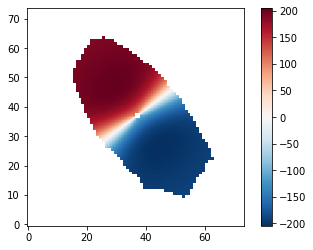

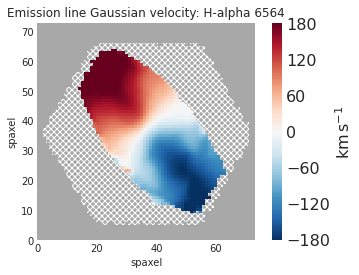

In [43]:
# Initial guesses
param_bounds_NFW = [[0.2, 1],  # Scale Factor [unitless]
                [0.001, 1000],  # Bulge Scale Velocity [km/s]
                [np.log10(m_spec), 13],  # Disk mass [log(Msun)]
                [0.1, 20],  # Disk radius [kpc]
                [0.00001, 0.01],  # Halo density [Msun/pc^2]
                [0.1, 100],  # Halo radius [kpc]
                [0.1,np.pi/2], # Inclination angle
                [-np.pi/2,np.pi/2],# Phase angle
                [0.1,40],#center_x
                [0.1,40]] #center_y
p0_NFW = [0.4,150,np.log10(m_spec)+0.5, 0.8*r50, 0.007, 20, incl,ph,37,37]
bestfit_NFW = minimize(nloglikelihood_NFW, p0_NFW, args=(gal_shape, v_mask, gas_ivar_5),bounds=param_bounds_NFW)
print('---------------------------------------------------')
print(bestfit_NFW)
# Plotting NFW
bestfit_param_NFW = [bestfit_NFW.x[0],bestfit_NFW.x[1],bestfit_NFW.x[2],bestfit_NFW.x[3],bestfit_NFW.x[4],bestfit_NFW.x[5],bestfit_NFW.x[6],bestfit_NFW.x[7],bestfit_NFW.x[8],bestfit_NFW.x[9]]
model_map_NFW = rot_incl_NFW(gal_shape,bestfit_param_NFW)
mask_model_map_NFW= ma.array(model_map_NFW,mask=gas_vfield_5.mask)
plt.imshow(mask_model_map_NFW,origin='lower',cmap='RdBu_r')
plt.colorbar()
gas_vfield_5.plot()

NFW Fitting w/o Bulge

[WARNING]: invalid value encountered in double_scalars (RuntimeWarning)
[WARNING]: invalid value encountered in double_scalars (RuntimeWarning)
[WARNING]: divide by zero encountered in double_scalars (RuntimeWarning)
[WARNING]: Extremely bad integrand behavior occurs at some points of the (IntegrationWarning)
[WARNING]: divide by zero encountered in log (RuntimeWarning)


---------------------------------------------------
      fun: 773492.8830896881
 hess_inv: <8x8 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 2.16647638e+06, -1.62244508e+05,  1.76100089e+08,  9.70192988e+04,
        3.47580014e+06, -5.20489991e+04,  1.81832220e+09,  1.82147925e+09])
  message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 189
      nit: 0
     njev: 21
   status: 2
  success: False
        x: array([1.08539516e+01, 5.53009807e+00, 7.00000000e-03, 2.00000000e+01,
       1.20059553e+00, 6.42187208e-01, 3.70000000e+01, 3.70000000e+01])


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:title={'center':'Emission line Gaussian velocity: H-alpha 6564'}, xlabel='spaxel', ylabel='spaxel'>)

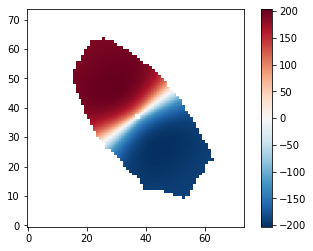

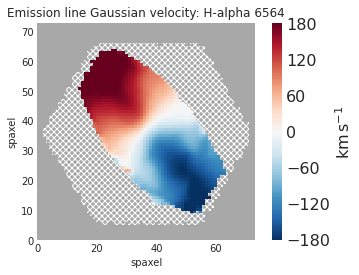

In [44]:
# Initial guesses
param_bounds_NFW_nb = [[np.log10(m_spec), 13],  # Disk mass [log(Msun)]
                [0.1, 20],  # Disk radius [kpc]
                [0.00001, 0.01],  # Halo density [Msun/pc^2]
                [0.1, 100],  # Halo radius [kpc]
                [0.1,np.pi/2], # Inclination angle
                [-np.pi/2,np.pi/2],# Phase angle
                [0.1,40],#center_x
                [0.1,40]] #center_y
p0_NFW_nb = [np.log10(m_spec)+0.5, 0.8*r50, 0.007, 20, incl,ph,37,37]
bestfit_NFW_nb = minimize(nloglikelihood_NFW_nb, p0_NFW_nb, args=(gal_shape, v_mask, gas_ivar_5),bounds=param_bounds_NFW_nb)
print('---------------------------------------------------')
print(bestfit_NFW_nb)
# Plotting NFW
bestfit_param_NFW_nb = [bestfit_NFW_nb.x[0],bestfit_NFW_nb.x[1],bestfit_NFW_nb.x[2],bestfit_NFW_nb.x[3],bestfit_NFW_nb.x[4],bestfit_NFW_nb.x[5],bestfit_NFW_nb.x[6],bestfit_NFW_nb.x[7]]
model_map_NFW_nb = rot_incl_NFW_nb(gal_shape,bestfit_param_NFW_nb)
mask_model_map_NFW_nb= ma.array(model_map_NFW_nb,mask=gas_vfield_5.mask)
plt.imshow(mask_model_map_NFW_nb,origin='lower',cmap='RdBu_r')
plt.colorbar()
gas_vfield_5.plot()

Burket Fitting

[WARNING]: invalid value encountered in double_scalars (RuntimeWarning)
[WARNING]: divide by zero encountered in double_scalars (RuntimeWarning)
[WARNING]: invalid value encountered in double_scalars (RuntimeWarning)
[WARNING]: divide by zero encountered in log (RuntimeWarning)


---------------------------------------------------
      fun: 6795858282.785709
 hess_inv: <10x10 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.26653613e+05,  6.75487728e+02,  1.20744241e+06, -1.11915824e+05,
        2.60863190e+07,  3.56737844e+03,  1.93569420e+06, -8.03743078e+04,
        9.52828785e+18,  1.03332496e+19])
  message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 231
      nit: 0
     njev: 21
   status: 2
  success: False
        x: array([4.00000000e-01, 1.50000000e+02, 1.08539516e+01, 5.53009807e+00,
       7.00000000e-03, 2.00000000e+01, 1.20059553e+00, 6.42187208e-01,
       3.70000000e+01, 3.70000000e+01])


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:title={'center':'Emission line Gaussian velocity: H-alpha 6564'}, xlabel='spaxel', ylabel='spaxel'>)

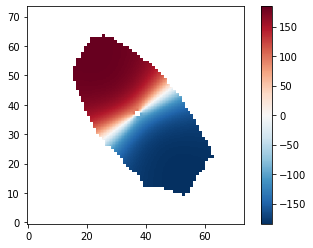

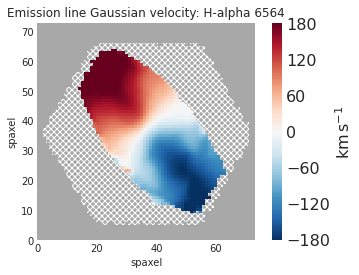

In [47]:
# Initial guesses
param_bounds_bur = [[0.2, 1],  # Scale Factor [unitless]
                [0.001, 1000],  # Bulge Scale Velocity [km/s]
                [np.log10(m_spec), 13],  # Disk mass [log(Msun)]
                [0.1, 20],  # Disk radius [kpc]
                [0.00001, 0.01],  # Halo density [Msun/pc^2]
                [0.1, 100],  # Halo radius [kpc]
                [0.1,np.pi/2], # Inclination angle
                [-np.pi/2,np.pi/2],# Phase angle
                [0.1,40],#center_x
                [0.1,40]] #center_y
p0_bur = [0.4,150,np.log10(m_spec)+0.5, 0.8*r50, 0.007, 20, incl,ph,37,37]
bestfit_bur = minimize(nloglikelihood_bur, p0_bur, args=(gal_shape, v_mask, gas_ivar_5),bounds=param_bounds_bur)
print('---------------------------------------------------')
print(bestfit_bur)
# Plotting Bur
bestfit_param_bur = [bestfit_bur.x[0],bestfit_bur.x[1],bestfit_bur.x[2],bestfit_bur.x[3],bestfit_bur.x[4],bestfit_bur.x[5],bestfit_bur.x[6],bestfit_bur.x[7],bestfit_bur.x[8],bestfit_bur.x[9]]
model_map_bur = rot_incl_bur(gal_shape,bestfit_param_bur)
mask_model_map_bur = ma.array(model_map_bur,mask=gas_vfield_5.mask)
plt.imshow(mask_model_map_bur,origin='lower',cmap='RdBu_r')
plt.colorbar()
gas_vfield_5.plot()

Burket Fitting w/o Bulge

[WARNING]: invalid value encountered in double_scalars (RuntimeWarning)
[WARNING]: invalid value encountered in double_scalars (RuntimeWarning)
[WARNING]: divide by zero encountered in log (RuntimeWarning)


---------------------------------------------------
      fun: 291468.0371976725
 hess_inv: <8x8 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.11265472e+06, -1.13983727e+05,  2.14550839e+07,  1.84091026e+03,
        1.79957954e+06, -7.96935168e+04,  1.82002401e+09,  1.82004330e+09])
  message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 189
      nit: 0
     njev: 21
   status: 2
  success: False
        x: array([1.08539516e+01, 5.53009807e+00, 7.00000000e-03, 2.00000000e+01,
       1.20059553e+00, 6.42187208e-01, 3.70000000e+01, 3.70000000e+01])


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:title={'center':'Emission line Gaussian velocity: H-alpha 6564'}, xlabel='spaxel', ylabel='spaxel'>)

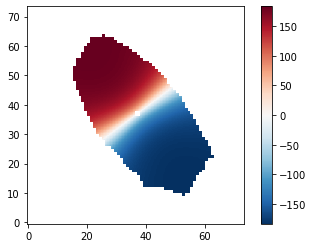

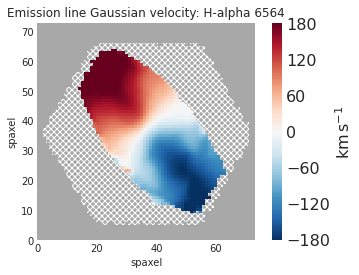

In [46]:
# Initial guesses
param_bounds_bur_nb = [[np.log10(m_spec), 13],  # Disk mass [log(Msun)]
                [0.1, 20],  # Disk radius [kpc]
                [0.00001, 0.01],  # Halo density [Msun/pc^2]
                [0.1, 100],  # Halo radius [kpc]
                [0.1,np.pi/2], # Inclination angle
                [-np.pi/2,np.pi/2],# Phase angle
                [0.1,40],#center_x
                [0.1,40]] #center_y
p0_bur_nb = [np.log10(m_spec)+0.5, 0.8*r50, 0.007, 20, incl,ph,37,37]
bestfit_bur_nb = minimize(nloglikelihood_bur_nb, p0_bur_nb, args=(gal_shape, v_mask, gas_ivar_5),bounds=param_bounds_bur_nb)
print('---------------------------------------------------')
print(bestfit_bur_nb)
# Plotting Burket
bestfit_param_bur_nb = [bestfit_bur_nb.x[0],bestfit_bur_nb.x[1],bestfit_bur_nb.x[2],bestfit_bur_nb.x[3],bestfit_bur_nb.x[4],bestfit_bur_nb.x[5],bestfit_bur_nb.x[6],bestfit_bur_nb.x[7]]
model_map_bur_nb = rot_incl_bur_nb(gal_shape,bestfit_param_bur_nb)
mask_model_map_bur_nb = ma.array(model_map_bur_nb,mask=gas_vfield_5.mask)
plt.imshow(mask_model_map_bur_nb,origin='lower',cmap='RdBu_r')
plt.colorbar()
gas_vfield_5.plot()